In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px


mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('nyc_taxi.csv')
df.head(5)

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
df = df.set_index('timestamp').resample('h').mean().reset_index()

In [6]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5


In [7]:
df['hour'] = df.timestamp.dt.hour

In [8]:
df

,timestamp,value,hour
0,2014-07-01 00:00:00,9485.5,0
1,2014-07-01 01:00:00,5433.0,1
2,2014-07-01 02:00:00,3346.5,2
3,2014-07-01 03:00:00,2216.5,3
4,2014-07-01 04:00:00,2189.5,4
...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19
5156,2015-01-31 20:00:00,24138.0,20
5157,2015-01-31 21:00:00,24194.5,21
5158,2015-01-31 22:00:00,26515.0,22


In [9]:
df['weekday'] = pd.Categorical(df.timestamp.dt.strftime('%A'),categories=['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday'], ordered=True)

In [10]:
df

,timestamp,value,hour,weekday
0,2014-07-01 00:00:00,9485.5,0,Tuesday
1,2014-07-01 01:00:00,5433.0,1,Tuesday
2,2014-07-01 02:00:00,3346.5,2,Tuesday
3,2014-07-01 03:00:00,2216.5,3,Tuesday
4,2014-07-01 04:00:00,2189.5,4,Tuesday
...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday
5156,2015-01-31 20:00:00,24138.0,20,Saturday
5157,2015-01-31 21:00:00,24194.5,21,Saturday
5158,2015-01-31 22:00:00,26515.0,22,Saturday


C:\Users\ACER\AppData\Local\Temp\ipykernel_93080\1253795599.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='weekday'>

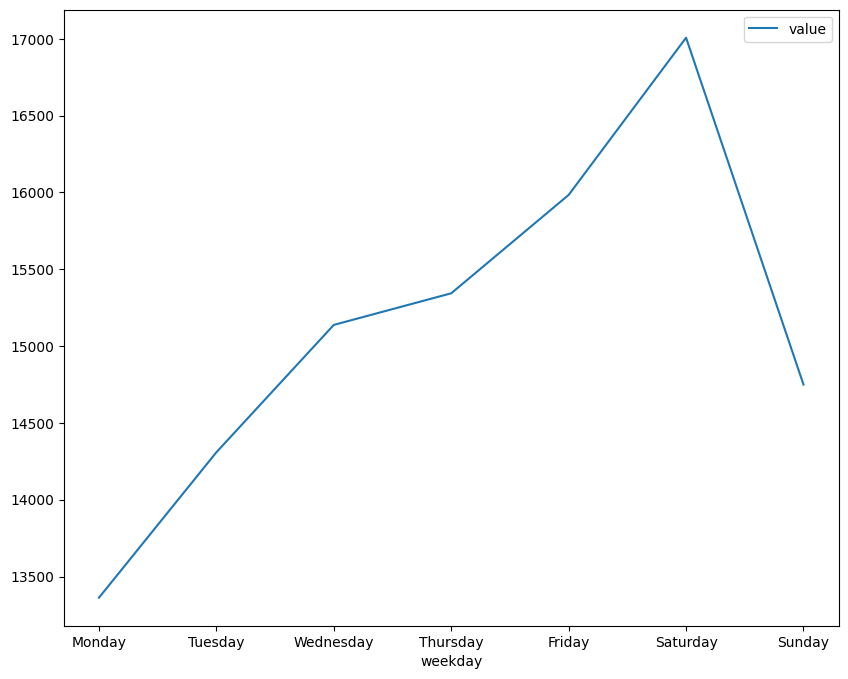

In [14]:
df[['value','weekday']].groupby('weekday').mean().plot()

<Axes: xlabel='hour'>

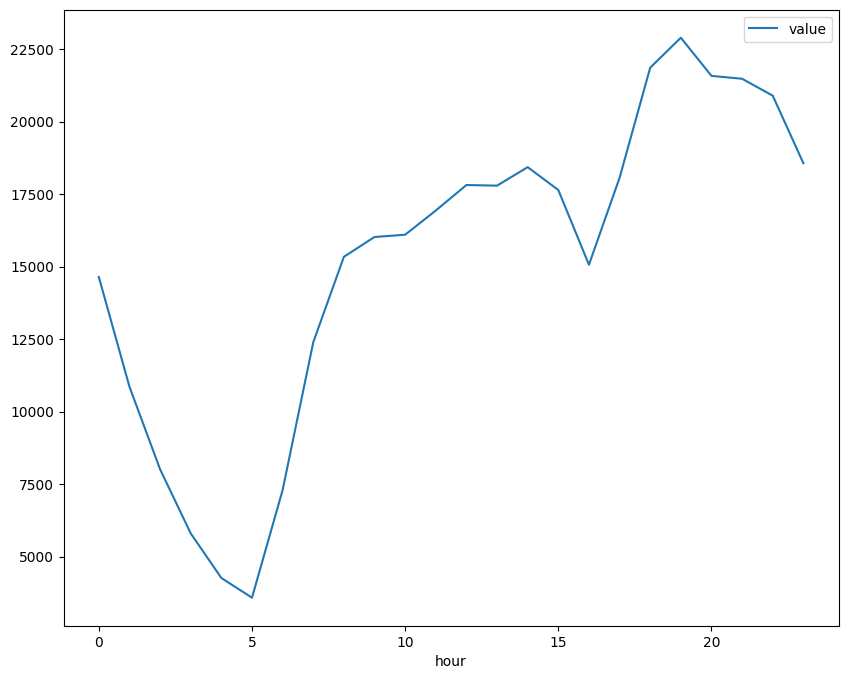

In [15]:
df[['value','hour']].groupby('hour').mean().plot()

In [20]:
fig  = px.line(df.reset_index(), x='timestamp',y='value', title='NYC TAXI')
fig.update_xaxes(
    rangeslider_visible =True,
)
fig.show()

Anamolous point could be :

Nov 2, 2014 ,1:00
Jan 1, 2015, 0:00
Jan 27,2015
sep 6 ,2014

In [21]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.004)
model.fit(df[['value']])

IsolationForest(contamination=0.004)

In [22]:
df['outliers'] = pd.Series(model.predict(df[['value']])).apply(lambda x: 'yes' if (x== -1) else 'no')

In [23]:
df

,timestamp,value,hour,weekday,outliers
0,2014-07-01 00:00:00,9485.5,0,Tuesday,no
1,2014-07-01 01:00:00,5433.0,1,Tuesday,no
2,2014-07-01 02:00:00,3346.5,2,Tuesday,no
3,2014-07-01 03:00:00,2216.5,3,Tuesday,no
4,2014-07-01 04:00:00,2189.5,4,Tuesday,no
...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,yes
5156,2015-01-31 20:00:00,24138.0,20,Saturday,no
5157,2015-01-31 21:00:00,24194.5,21,Saturday,no
5158,2015-01-31 22:00:00,26515.0,22,Saturday,no


In [24]:
df.query('outliers == "yes"')

,timestamp,value,hour,weekday,outliers
1631,2014-09-06 23:00:00,29418.5,23,Saturday,yes
2135,2014-09-27 23:00:00,28024.5,23,Saturday,yes
2639,2014-10-18 23:00:00,28253.5,23,Saturday,yes
2971,2014-11-01 19:00:00,27912.0,19,Saturday,yes
2977,2014-11-02 01:00:00,37204.5,1,Sunday,yes
3143,2014-11-08 23:00:00,27926.0,23,Saturday,yes
3479,2014-11-22 23:00:00,28299.0,23,Saturday,yes
4417,2015-01-01 01:00:00,29292.0,1,Thursday,yes
4655,2015-01-10 23:00:00,28351.0,23,Saturday,yes
5039,2015-01-26 23:00:00,243.0,23,Monday,yes


In [26]:
fig = px.scatter(df.reset_index(), x='timestamp', y='value', color='outliers' ,hover_data=['weekday'],title='NYC TAXI')
fig.update_xaxes(rangeslider_visible =True)
fig.show()

With no contamination :

In [27]:
m = IsolationForest()
m.fit(df[['value']])

IsolationForest()

In [28]:
score = model.decision_function(df[['value']])
score

array([0.1636079 , 0.14422843, 0.17252876, ..., 0.15508484, 0.08461102,
       0.08831562])

(array([  1.,  11.,   5.,   2.,   0.,   6.,   5.,   1.,   5.,   4.,   5.,
          4.,   3.,  11.,   7.,   9.,  18.,   5.,   7.,  29.,  12.,  22.,
          8.,  24.,  78., 168., 124., 130., 188., 226., 373., 144., 228.,
        388., 351., 131.,  74., 172.,  83., 166., 212., 168.,  82., 218.,
        155., 155., 227., 166., 420., 129.]),
 array([-0.03140062, -0.02520946, -0.0190183 , -0.01282714, -0.00663598,
        -0.00044482,  0.00574634,  0.0119375 ,  0.01812866,  0.02431981,
         0.03051097,  0.03670213,  0.04289329,  0.04908445,  0.05527561,
         0.06146677,  0.06765793,  0.07384909,  0.08004025,  0.08623141,
         0.09242257,  0.09861373,  0.10480489,  0.11099605,  0.11718721,
         0.12337837,  0.12956953,  0.13576069,  0.14195185,  0.14814301,
         0.15433416,  0.16052532,  0.16671648,  0.17290764,  0.1790988 ,
         0.18528996,  0.19148112,  0.19767228,  0.20386344,  0.2100546 ,
         0.21624576,  0.22243692,  0.22862808,  0.23481924,  0.2410104 ,
 

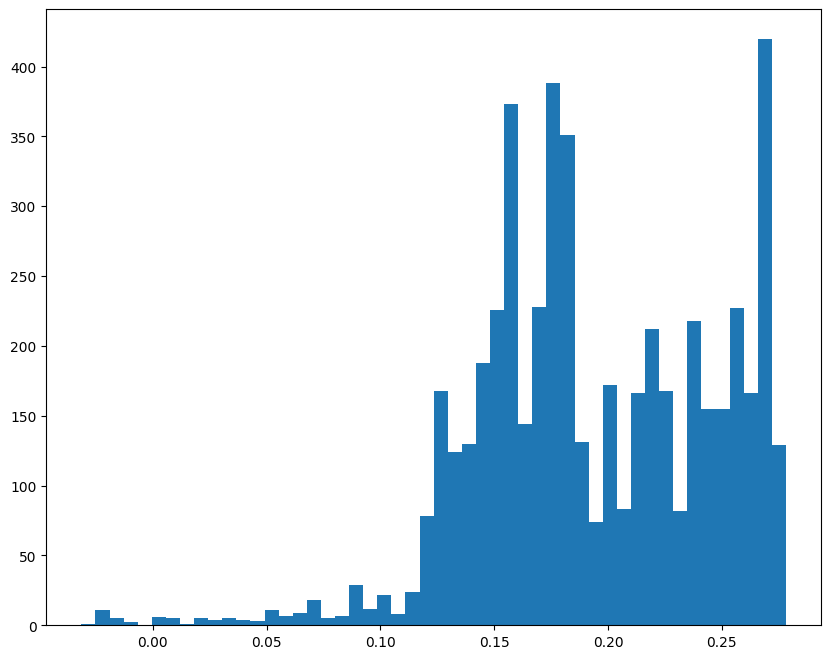

In [29]:
plt.hist(score,bins=50)

In [30]:
df['score'] = score

In [31]:
df

,timestamp,value,hour,weekday,outliers,score
0,2014-07-01 00:00:00,9485.5,0,Tuesday,no,0.163608
1,2014-07-01 01:00:00,5433.0,1,Tuesday,no,0.144228
2,2014-07-01 02:00:00,3346.5,2,Tuesday,no,0.172529
3,2014-07-01 03:00:00,2216.5,3,Tuesday,no,0.132238
4,2014-07-01 04:00:00,2189.5,4,Tuesday,no,0.132612
...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,yes,-0.018579
5156,2015-01-31 20:00:00,24138.0,20,Saturday,no,0.160348
5157,2015-01-31 21:00:00,24194.5,21,Saturday,no,0.155085
5158,2015-01-31 22:00:00,26515.0,22,Saturday,no,0.084611


In [32]:
df.query('score <= 0.05')

,timestamp,value,hour,weekday,outliers,score
1603,2014-09-05 19:00:00,27074.5,19,Friday,no,0.031821
1630,2014-09-06 22:00:00,27414.0,22,Saturday,no,0.008342
1631,2014-09-06 23:00:00,29418.5,23,Saturday,yes,-0.022936
1775,2014-09-12 23:00:00,27331.5,23,Friday,no,0.018272
1799,2014-09-13 23:00:00,27078.5,23,Saturday,no,0.032651
1942,2014-09-19 22:00:00,27385.5,22,Friday,no,0.015520
1943,2014-09-19 23:00:00,26987.5,23,Friday,no,0.046342
2135,2014-09-27 23:00:00,28024.5,23,Saturday,yes,-0.014728
2471,2014-10-11 23:00:00,27117.5,23,Saturday,no,0.028719
2635,2014-10-18 19:00:00,27341.0,19,Saturday,no,0.018272


(array([  1.,   0.,   9.,   2.,   4.,   1.,   0.,   2.,   0.,   0.,   6.,
          0.,   4.,   1.,   0.,   1.,   4.,   1.,   2.,   2.,   4.,   1.,
          2.,   2.,   1.,   2.,   5.,   6.,   1.,   6.,   4.,   5.,  10.,
          8.,   1.,   4.,   3.,   4.,  10.,  19.,   6.,   6.,  16.,   6.,
          7.,   1.,   4.,  20.,  38.,  40.,  81.,  87.,  66.,  58.,  47.,
         83.,  96.,  92., 103., 123., 168., 205.,  64.,  80.,  97., 131.,
        220., 168., 164., 187.,  82.,  49.,  39.,  35.,  82.,  90.,  44.,
         39.,  95.,  71.,  60., 152., 122.,  46.,  28.,  54.,  86., 132.,
         52., 103., 101.,  54.,  71., 156.,  85.,  81., 121., 299.,  79.,
         50.]),
 array([-0.03140062, -0.02830504, -0.02520946, -0.02211388, -0.0190183 ,
        -0.01592272, -0.01282714, -0.00973156, -0.00663598, -0.0035404 ,
        -0.00044482,  0.00265076,  0.00574634,  0.00884192,  0.0119375 ,
         0.01503308,  0.01812866,  0.02122424,  0.02431981,  0.02741539,
         0.03051097,  0.03

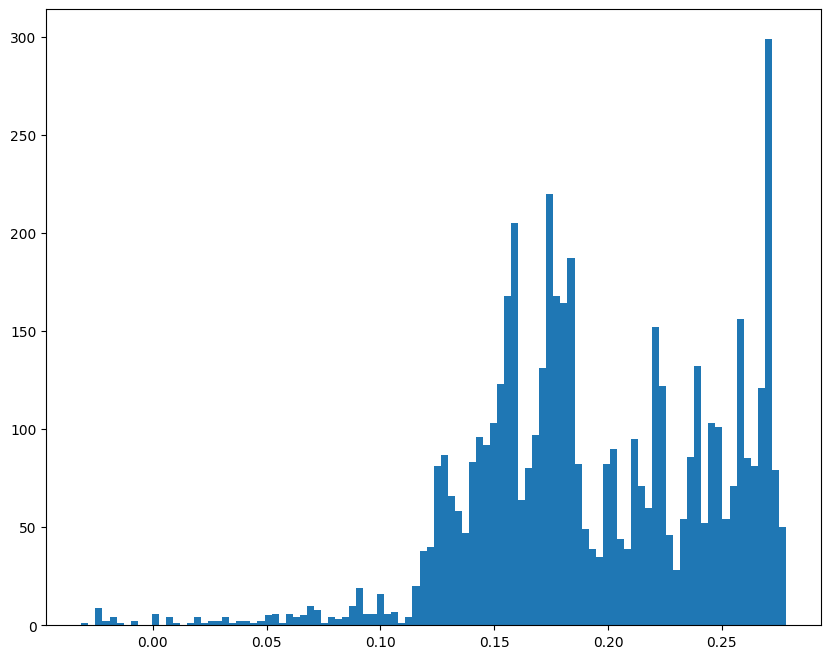

In [34]:
plt.hist(score,bins=100)